<a href="https://colab.research.google.com/github/hasibzunair/tf-tutorial/blob/main/tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Building machine learning models using TensorFlow

**Author:** [Hasib Zunair](https://hasibzunair.github.io/)<br>
**Date created:** 2021/10/01<br>
**Last modified:** 2021/10/05<br>

**Description:** This tutorial introduces TensorFlow, a Python based machine learning (ML) library. It begins by importing the main Python modules for building machine learning models. Then it implements the simplest possible neural network to solve a function $y=2x-1$. Next, it shows how to build and train convolutional neural networks for image classification to identify cats and dogs using unstructured datasets (e.g. images). Finally, it shows how to build and train a reconstruction convolutional autoencoder to detect anomalies in time series data using structured/tabular datasets (e.g. CSV files). After being introduced to solve different tasks using neural networks implemented in TensorFlow, participants apply what they have learned on their own datasets and tasks.

**Learning Objectives:**
At the end of this tutorial on TensorFlow, participants will be able to:

* describe how to import the main Python modules for building ML models
* implement neural networks in TensorFlow
* use unstructured as well as structured datasets with TensorFlow
* apply neural networks to classification and anomaly detection tasks

# Imports 

Let's start with our imports. Here we are importing TensorFlow and calling it tf for easy reference.

Then we import a library called numpy, which helps us to represent our data as lists easily and [quickly](https://towardsdatascience.com/how-fast-numpy-really-is-e9111df44347).

The framework for defining a neural network as a set of Sequential layers is called keras, so we import that too.

In [8]:
# Main libraries
import tensorflow as tf
import numpy as np
from tensorflow import keras

# Helper libraries
import matplotlib.pyplot as plt # For plotting graphs

# 1. Hello World of Machine Learning with Neural Networks

Like every first app you should start with something super simple that shows the overall scaffolding for how your code works.

In the case of creating neural networks, the sample we use is one where it learns the relationship between two numbers. So, for example, if you were writing code for a function like this, you already know the 'rules' —

```python
float hw_function(float x){
    float y = (2 * x) - 1;
    return y;
}
```

So how would you train a neural network to do the equivalent task? Using data! By feeding it with a set of Xs, and a set of Ys, it should be able to figure out the relationship between them.

This is obviously a very different paradigm than what you might be used to, so let's step through it piece by piece.

## Define and Compile the Neural Network

Next we will create the simplest possible neural network. It has 1 layer, and that layer has 1 neuron, and the input shape to it is just 1 value.

In [2]:
model = tf.keras.Sequential([keras.layers.Dense(units=1, input_shape=[1])])

Now we compile our Neural Network. When we do so, we have to specify 2 functions, a **loss** and an **optimizer**.

If you've seen lots of math for machine learning, here's where it's usually used, but in this case it's nicely encapsulated in functions for you. But what happens here — let's explain...

We know that in our function, the relationship between the numbers is $y=2x-1$.

When the computer is trying to 'learn' that, it makes a guess...maybe $y=10x+10$. The **loss** function measures the guessed answers against the known correct answers and measures how well or how badly it did.

It then uses the **optimizer** function to make another guess. Based on how the loss function went, it will try to minimize the loss. At that point maybe it will come up with somehting like $y=5x+5$, which, while still pretty bad, is closer to the correct result (i.e. the loss is lower)

It will repeat this for the number of **epochs** which you will see shortly. But first, here's how we tell it to use **mean squared error** for the loss and **stochastic gradient descent** for the optimizer. You don't need to understand the math for these yet, but you can see that they work! :)

Over time you will learn the different and appropriate loss and optimizer functions for different scenarios.

In [3]:
model.compile(optimizer='sgd', loss='mean_squared_error')

## Providing the Data

Next up we'll feed in some data. In this case we are taking 6 xs and 6ys. You can see that the relationship between these is that $y=2x-1$, so where $x = -1$, $y=-3$ yada yada yada.

A python library called 'Numpy' provides lots of array type data structures that are a defacto standard way of doing it. We declare that we want to use these by specifying the values as an ```np.array[]```

In [4]:
xs = np.array([-1.0,  0.0, 1.0, 2.0, 3.0, 4.0], dtype=float)
ys = np.array([-3.0, -1.0, 1.0, 3.0, 5.0, 7.0], dtype=float)

## Training the Neural Network

The process of training the neural network, where it 'learns' the relationship between the `xs` and `ys` is in the `model.fit` call. This is where it will go through the loop we spoke about above, *making a guess*, *measuring how good or bad it is* (aka the loss), *using the opimizer to make another guess* etc. It will do it for the number of **epochs** you specify. When you run this code, you'll see the loss on the right hand side.

In [5]:
model.fit(xs, ys, epochs=500)

Epoch 1/500
1/1 [==============================] - 1s 712ms/step - loss: 30.2697
Epoch 2/500
1/1 [==============================] - 0s 10ms/step - loss: 24.1288
Epoch 3/500
1/1 [==============================] - 0s 7ms/step - loss: 19.2910
Epoch 4/500
1/1 [==============================] - 0s 6ms/step - loss: 15.4785
Epoch 5/500
1/1 [==============================] - 0s 6ms/step - loss: 12.4729
Epoch 6/500
1/1 [==============================] - 0s 6ms/step - loss: 10.1021
Epoch 7/500
1/1 [==============================] - 0s 5ms/step - loss: 8.2310
Epoch 8/500
1/1 [==============================] - 0s 8ms/step - loss: 6.7530
Epoch 9/500
1/1 [==============================] - 0s 8ms/step - loss: 5.5845
Epoch 10/500
1/1 [==============================] - 0s 15ms/step - loss: 4.6597
Epoch 11/500
1/1 [==============================] - 0s 6ms/step - loss: 3.9266
Epoch 12/500
1/1 [==============================] - 0s 9ms/step - loss: 3.3444
Epoch 13/500
1/1 [==============================] -

## Plot the loss and epochs during training

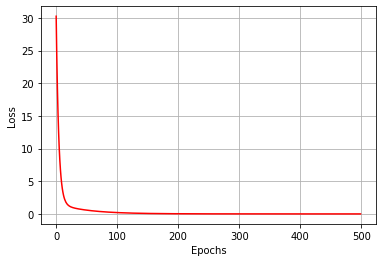

In [6]:
# Get loss and epochs
loss = model.history.history['loss']
epochs = range(len(loss))

# Plot loss versus epochs
plt.plot(epochs, loss, 'r')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.grid(True)

# Show figure
plt.show()

Ok, now you have a model that has been trained to learn the relationshop between X and Y. You can use the `model.predict` method to have it figure out the Y for a previously unknown X. So, for example, if $X = 10$, what do you think Y will be? Take a guess before you run this code:

In [7]:
print(model.predict([10.0]))

[[18.979]]



You might have thought 19, right? But it ended up being a little under. Why do you think that is?

Remember that neural networks deal with **probabilities**, so given the data that we fed the neural network with, it calculated that there is a very high probability that the relationship between X and Y is $Y=2X-1$, but with only 6 data points we can't know for sure. As a result, the result for 10 is very close to 19, but not necessarily 19.

As you work with neural networks, you'll see this pattern recurring. You will almost always deal with probabilities, not certainties, and will do a little bit of coding to figure out what the result is based on the probabilities, particularly when it comes to classification.

# 2.1 Image classification
